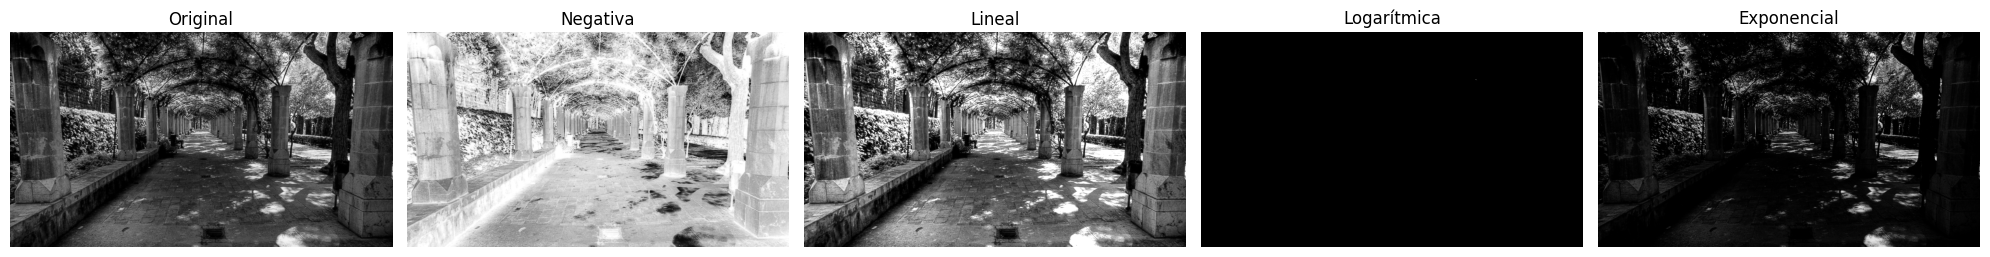

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def transformacion_negativa(imagen):
    return 255 - imagen

def transformacion_lineal(imagen, a=1, b=0):
    return np.clip(imagen * a + b, 0, 255).astype(np.uint8)

def transformacion_logaritmica(imagen, c=255):
    imagen_float = np.float32(imagen + 1) / 255.0
    imagen_log = c * np.log(imagen_float)
    return np.clip(imagen_log * 255, 0, 255).astype(np.uint8)

def transformacion_exponencial(imagen, c=1, gamma=1):
    imagen_float = np.float32(imagen) / 255.0
    imagen_exp = c * (imagen_float ** gamma)
    return np.clip(imagen_exp * 255, 0, 255).astype(np.uint8)

# Ejemplo de uso
imagen = plt.imread('../imagenes/im1.jpg')

# Convertir a escala de grises si es necesario
if len(imagen.shape) == 3:
    imagen = np.dot(imagen[...,:3], [0.2989, 0.5870, 0.1140])

imagen_negativa = transformacion_negativa(imagen)
imagen_lineal = transformacion_lineal(imagen, a=1.5, b=20)
imagen_logaritmica = transformacion_logaritmica(imagen)
imagen_exponencial = transformacion_exponencial(imagen, gamma=2.5)

# Visualizar las imágenes transformadas usando matplotlib
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(imagen, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(imagen_negativa, cmap='gray')
axs[1].set_title("Negativa")
axs[1].axis('off')

axs[2].imshow(imagen_lineal, cmap='gray')
axs[2].set_title("Lineal")
axs[2].axis('off')

axs[3].imshow(imagen_logaritmica, cmap='gray')
axs[3].set_title("Logarítmica")
axs[3].axis('off')

axs[4].imshow(imagen_exponencial, cmap='gray')
axs[4].set_title("Exponencial")
axs[4].axis('off')

plt.tight_layout()
plt.show()

